# Week 3 Overview

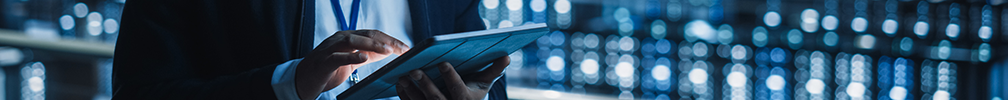

Welcome to Week 3! 
This week, you will learn about univariate statistics, histogram variants, and other univariate graphs. This means handling and graphing a single column of data. For example, if you have a list of tree heights, you could draw a histogram to show how many trees there were at each height. There are some binning issues: do we want to group trees together with heights between 30-35 feet, 35-40 feet, 40-45 feet, and 45-50 feet? Or do you want to group 30-40 feet and 40-50 feet? You will learn about different variants of histograms as well as practice bar charts and stacked bar charts.

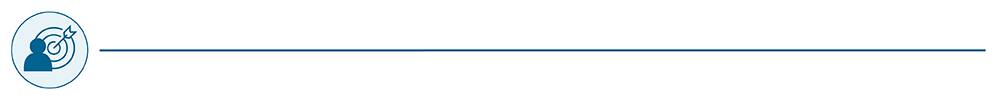

### Learning Objectives
At the end of this week, you should be able to:
- Distinguish between various types of charts and graphs (Histogram, bar / stacked bar, KDE, swarm, violin, box)
- Explain the strengths and weaknesses of various data visualization formats (Histogram, bar / stacked bar, KDE, swarm, violin, box)
- Select the most appropriate visualization based on the type of data
- Create plots/graphs in a variety of formats
- Describe univariate analysis
- Analyze how different visualizations can affect audience interpretation
- Create data visualizations using Matplotlib
- Reproduce a graph/data visualization from an example graph/data visualization
- Analyze existing data visualizations to identify strengths and weaknesses 
- Apply principles from Storytelling with Data (SWD) to create graph

## 3.1 Lesson: Bar Charts and Univariate Graphs

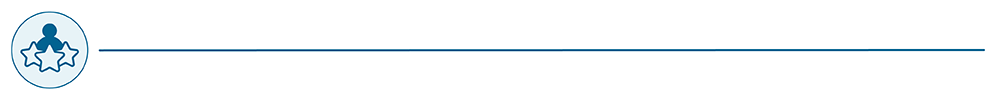

### Bar Charts and Univariate Graphs:
When running the cells in a notebook that are included in this lesson, you would need to import the following:

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

Let's make a dataset (in this case, just a series) that is weighted to have more small values than large values. By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1. This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset. This kind of trick – transforming one random variable to get another – can generate a variety of random datasets for you. We then multiply by 100 to get a number between 0 and 100.

In [2]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values. Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

Next, you would need to run this

In [3]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series. For some reason, it decided to have exactly 11 bins. We allowed it to choose the number of bins. Most values – about 300 of them – are between 0 and 9, and the next most likely bin is between 9 and 18. Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

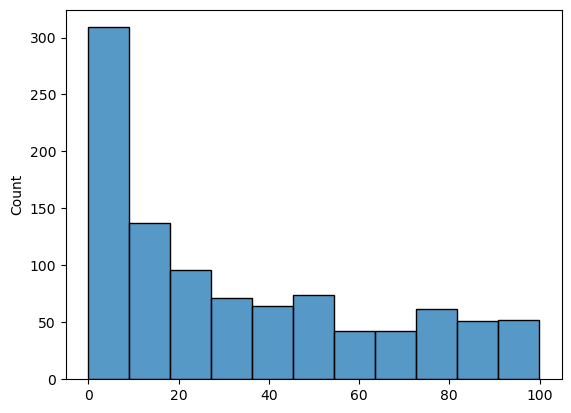

In [4]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which, by default, is chosen by seaborn. We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [5]:
np.histogram(lesson_series, bins = 10)[0]

array([322, 146,  96,  78,  72,  63,  48,  58,  58,  59])

What happens if we override seaborn and choose the number of bins ourselves? We could choose a much larger number of bins:

<Axes: ylabel='Count'>

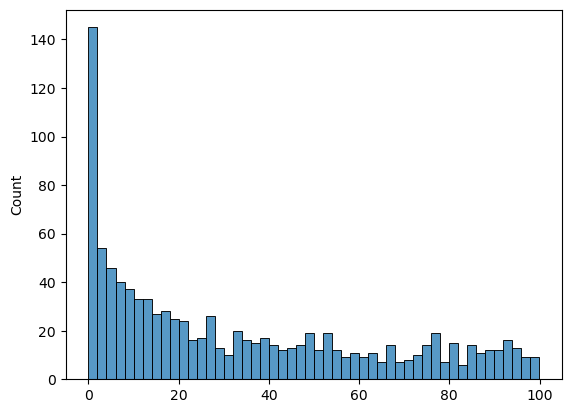

In [6]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50-bin picture is that the outliers are worse. That is, the graph wobbles up and down a bit more randomly. That's because there are fewer values in each bin, so chance plays a greater role. If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

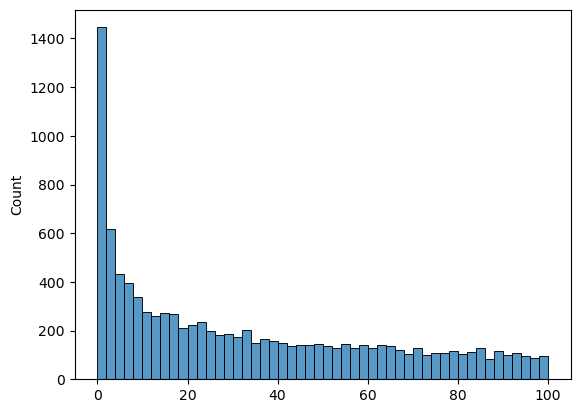

In [7]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph. Why does more data make for a smoother graph? Something for you to think about. If we say it’s because a larger number of data points in each bin reduces the role of chance – why is that?

Here is a KDE (Kernel Density Estimate) plot. It's just the same histogram but drawn smoothly. The KDE plot doesn't have a "number of bins." It's always drawn the same way. In this case, because of the smoothness of the curve, x-values less than zero and above 100 are still plotted, even though there were no such values in the dataset. This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

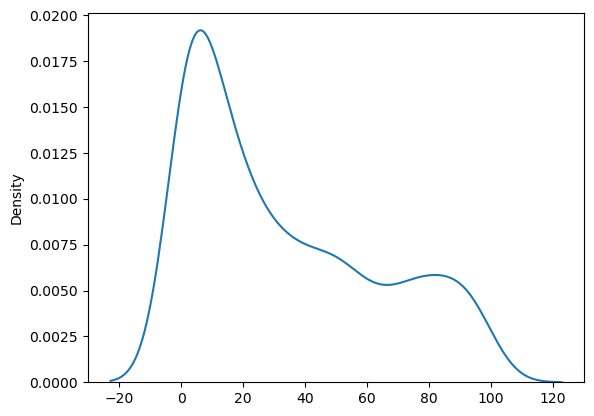

In [8]:
sns.kdeplot(lesson_series)

We could also draw a box plot. This time, to construct the data, I used a fourth power rather than squaring, with only 100 data points, so that the points were even more concentrated on the small numbers. It turns out that this will create a more interesting boxplot. The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height. (The bottom whisker cannot be seen because it's pushed against the bottom of the graph.) The filled-in box shows that half of the values are between about 0 and 30 on the y-axis. Is that what you'd expect? The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75. Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), thats

$0.25^4 * 100 \quad  = \quad 0.4$ and $0.75^4 * 100 = 32$.



It's plausible that those are the height of the bottom and top of the box. We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

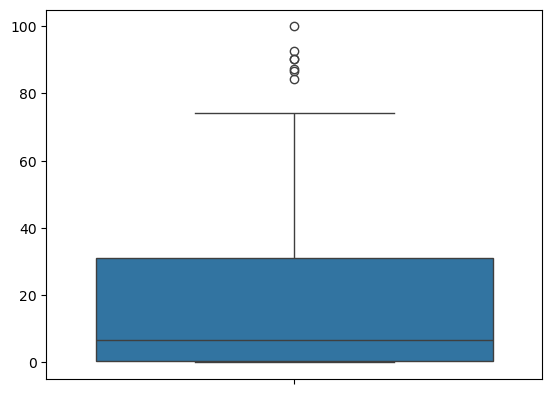

In [9]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers because it isn't so strongly weighted toward small values:

<Axes: >

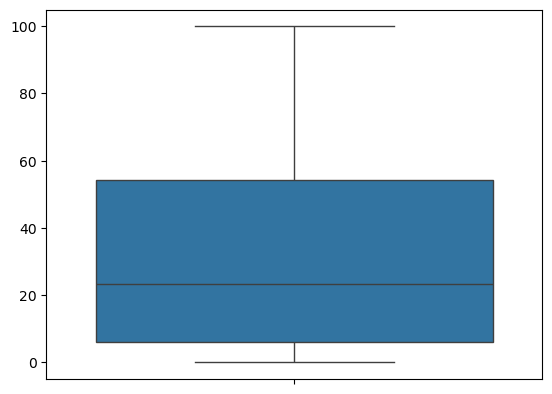

In [10]:
sns.boxplot(lesson_series)

Going back to the fourth power series, we have another histogram variant, the violin plot. This simply combines a KDE plot (turned on its side and forming two sides of the violin) with a boxplot:

<Axes: >

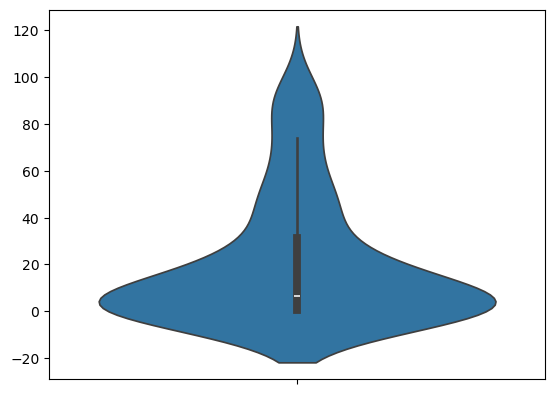

In [11]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) in addition to each point.

<Axes: >

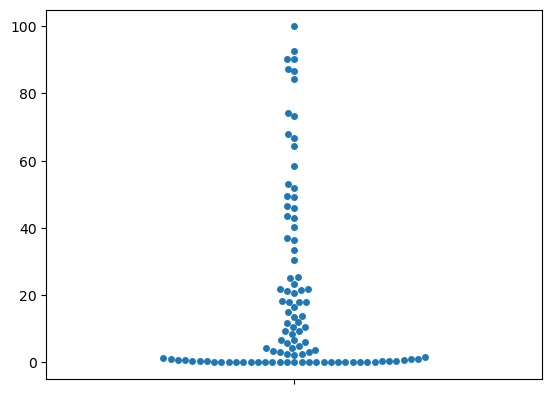

In [12]:
sns.swarmplot(lesson_series_3)

### Think About It
- Why would you choose a histogram, KDE plot, violin plot, box plot, or swarm plot? What are the advantages and disadvantages of each?
- Storytelling With Data does not show most of these plots. What do you think the author would say about these plots? Would they satisfy the author’s needs? Are they good at communicating? Would they be good for presenting to a group of data scientists? An investor? A manager who knows a great deal about the business but little about data science?

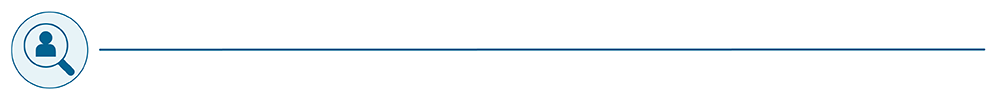

___

### Resources
The following resources are required for your learning this week. Make sure you review everything linked below, as you may be tested on the concepts in an upcoming knowledge check or quiz.

Reading | Knaflic, C. N. (2015). Storytelling with data: A data visualization guide for business professionals. Chapter 2: Choosing an Effective Visual. John Wiley & Sons. 

Read Chapter 2 from the beginning to the “Bars” section. In this chapter, you will learn about types of plots that can be useful for communicating. You should think about the other univariate plots you’re learning about: what would the author think of them?

Reading | Yi, M. (n.d.). A Complete Guide to Violin Plots. Atlassian. 

In this article, you will learn about violin plots as well as their components (KDE plots, box plots, and histograms).